## Analisando os dados


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('all_games.csv', encoding='utf-8')
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [2]:
df.isnull().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

In [3]:
df.shape

(18800, 6)

In [4]:
df['summary'].fillna('Missing', inplace=True)

In [5]:
df.isnull().sum()

name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

In [6]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [7]:
df['platform'].value_counts()

 PC                  4864
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: platform, dtype: int64

## Data Cleaning

In [8]:
df[df['user_review']=='tbd']

,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,"August 10, 2021",Synth Riders is your freestyle dancing VR rhyt...,89,tbd
963,Tiger Woods PGA Tour 2005,GameCube,"September 20, 2004",Challenge professional golfer Tiger Woods to c...,88,tbd
1277,NASCAR 2005: Chase for the Cup,Xbox,"August 31, 2004",Do you have what it takes to be a top NASCAR d...,86,tbd
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",Missing,86,tbd
2098,Mushihimesama,Switch,"June 15, 2021",Mushihimesama (Bug Princess in English) is a v...,84,tbd
...,...,...,...,...,...,...
18594,Air Conflicts: Aces of World War II,PSP,"April 14, 2009",Air Conflicts is an arcade flight simulator ga...,36,tbd
18639,King of Clubs,Wii,"August 4, 2008","Never the same game twice, this absorbing and ...",35,tbd
18700,Jenga World Tour,DS,"November 13, 2007",Jenga is based on the world famous wooden bloc...,32,tbd
18715,Dream Chronicles,PlayStation 3,"November 23, 2010",Unlock the secrets of the beautiful and myster...,31,tbd


In [9]:
df = df.drop(df[df['user_review'] == 'tbd'].index)

In [10]:
count_platform = df["platform"].value_counts().reset_index()
count_platform.columns = ["Platform", "Count"]
count_platform

,Platform,Count
0,PC,4660
1,PlayStation 4,1950
2,Xbox 360,1547
3,PlayStation 2,1311
4,Switch,1216
5,PlayStation 3,1208
6,Xbox One,1089
7,Xbox,686
8,DS,599
9,Wii,597


## Count by platform

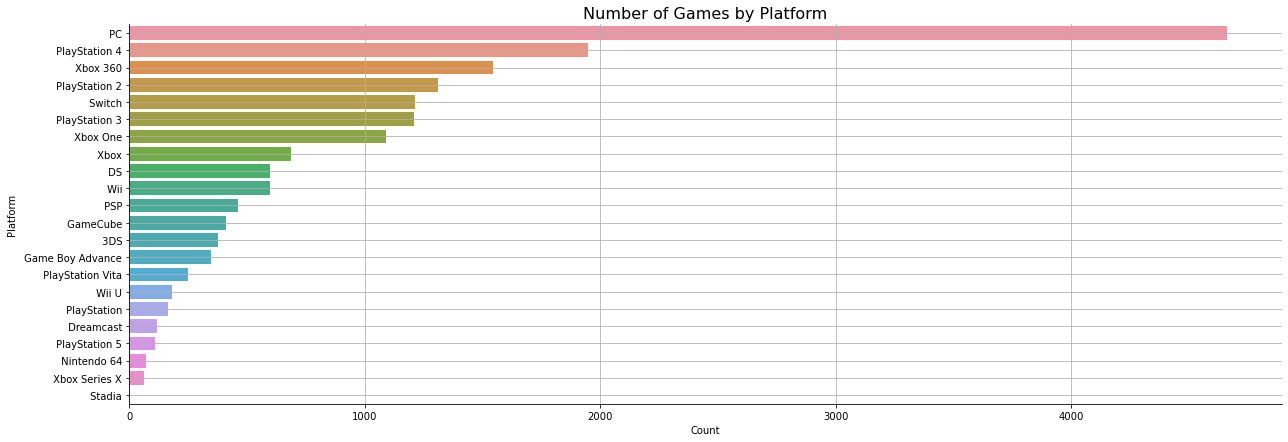

In [11]:
sns.catplot(x="Count", y="Platform", kind="bar", data=count_platform, height=6, aspect=3)
plt.title('Number of Games by Platform', fontsize=16)
plt.grid(True)

## Top 10 Games by User Review

In [12]:
import numpy as np

df['user_review'] = df['user_review'].astype(np.float)


C:\Users\LUCASP~1\AppData\Local\Temp/ipykernel_15424/2417005208.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['user_review'] = df['user_review'].astype(np.float)


In [13]:
top_user_score = df.sort_values(['user_review'], ascending=False)[:10]
top_user_score[['name', 'user_review']]

,name,user_review
3504,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,9.7
2450,Ghost Trick: Phantom Detective,9.7
4953,Rochard,9.7
14836,Metal Torrent,9.7
9550,After Burner Climax,9.7
4844,GrimGrimoire,9.7
10936,Tengami,9.7
12434,Crystar,9.6
4573,Superliminal,9.6
7638,Superliminal,9.6


Text(0, 0.5, 'Name')

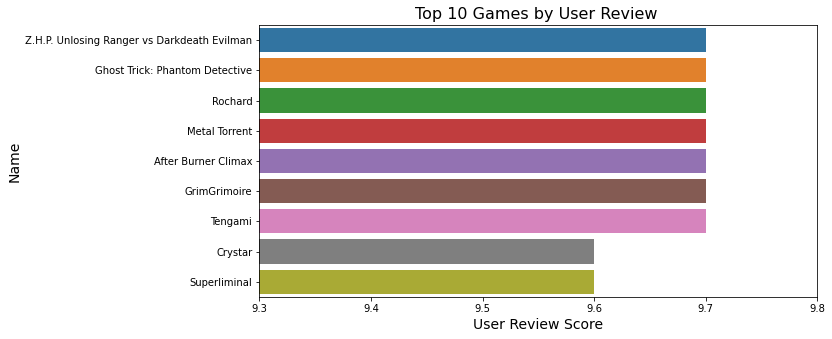

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(x = top_user_score['user_review'], y = top_user_score['name'])
plt.xlim(9.3, 9.8)
plt.title('Top 10 Games by User Review ', fontsize = 16)
plt.xlabel('User Review Score', fontsize = 14)
plt.ylabel('Name', fontsize = 14)

## Top 10 Games by Meta Score

In [15]:
top_meta_score = df.sort_values(['meta_score'], ascending = False)[:10]
top_meta_score[['name', 'meta_score']]

,name,meta_score
0,The Legend of Zelda: Ocarina of Time,99
2,Grand Theft Auto IV,98
3,SoulCalibur,98
4,Grand Theft Auto IV,98
1,Tony Hawk's Pro Skater 2,98
14,Tony Hawk's Pro Skater 3,97
23,NFL 2K1,97
22,The House in Fata Morgana - Dreams of the Reve...,97
21,Halo: Combat Evolved,97
20,Super Mario Odyssey,97


Text(0, 0.5, 'Name')

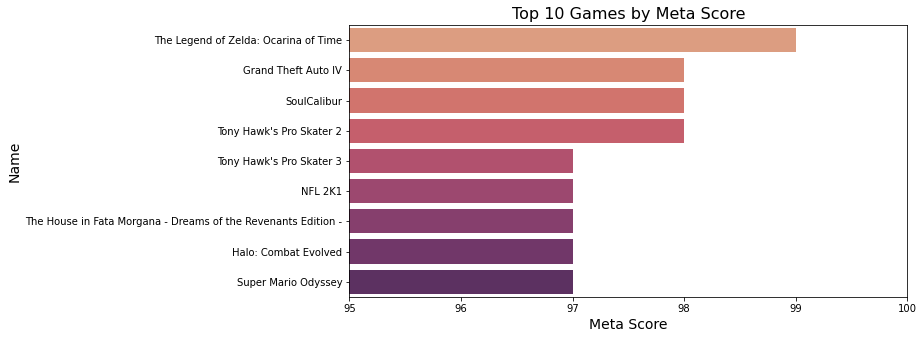

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=top_meta_score['meta_score'], y=top_meta_score['name'], 
            orient = 'h', 
            palette='flare')
plt.xlim(95, 100)
plt.title('Top 10 Games by Meta Score', fontsize=16)
plt.xlabel('Meta Score', fontsize=14)
plt.ylabel('Name', fontsize=14)


## Era that had the best video games

In [17]:
era = df
era['release_date'] = pd.to_datetime(era['release_date'])


In [18]:
era['year'] = df['release_date'].dt.year

In [19]:
era1 = era.groupby('year')

In [20]:
era2 = df.sort_values(['meta_score'], ascending = False)
era2[['year', 'meta_score']]

,year,meta_score
0,1998,99
2,2008,98
3,1999,98
4,2008,98
1,2000,98
...,...,...
18795,2013,22
18796,2003,22
18797,2015,21
18798,2012,20


In [21]:
era2 = era.groupby('year')

In [22]:
era2.head()

,name,platform,release_date,summary,meta_score,user_review,year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008
...,...,...,...,...,...,...,...
267,The Witcher 3: Wild Hunt - Blood and Wine,PC,2016-05-30,This expansion pack is an old-school add on wi...,92,9.3,2016
276,Dark Souls II,Xbox 360,2014-03-11,Prepare to die... Again. Dare yourself to enga...,91,7.9,2014
289,Overwatch,PC,2016-05-23,Overwatch is a highly stylized team-based shoo...,91,6.5,2016
308,Dragon Quest XI S: Echoes of an Elusive Age - ...,Switch,2019-09-27,Dragon Quest XI: Echoes of an Elusive Age tell...,91,8.9,2019


In [23]:
era2['meta_score'].sum().sort_values(ascending = False).reset_index()

,year,meta_score
0,2018,78960
1,2017,72380
2,2019,71288
3,2020,69924
4,2016,67667
5,2015,60403
6,2009,60348
7,2008,57499
8,2011,57460
9,2007,57244


In [24]:
era3 = era2['meta_score'].sum().sort_values(ascending = False).reset_index()
era3.columns = ["year", "Total"]

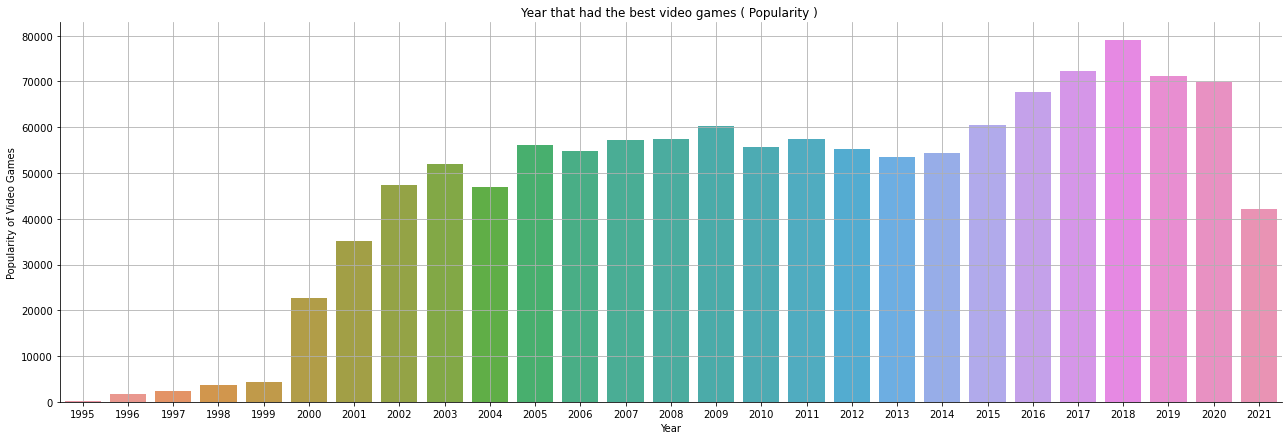

In [25]:
sns.catplot(x="year", y="Total", kind="bar", data=era3, height=6, aspect=3)
plt.title("Year that had the best video games ( Popularity ) ")
plt.xlabel('Year')
plt.ylabel("Popularity of Video Games")
plt.grid(True)

## IA


In [26]:
!pip install kneed

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from kneed import KneeLocator # detector de joelho/cotovelo da curva
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go

data = pd.read_csv('all_games.csv', )
data.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [28]:
games_name = data['name']
data.drop('name', axis=1, inplace=True)
games_plaform = data['platform']
data.drop('platform', axis=1, inplace=True)
games_release_date = data['release_date']
data.drop('release_date', axis=1, inplace=True)
games_summary = data['summary']
data.drop('summary', axis=1, inplace=True)


In [29]:
import numpy as np
data[data['user_review']=='tbd']
data = data.drop(data[data['user_review'] == 'tbd'].index)
data['user_review'] = data['user_review'].astype(np.float)

C:\Users\LUCASP~1\AppData\Local\Temp/ipykernel_15424/4951883.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['user_review'] = data['user_review'].astype(np.float)



K	Soma das distâncias quadráticas
1 	 769.3827038104083
2 	 397.71884663728207
3 	 290.91250665049523
4 	 223.301742501509
5 	 180.83906794340538
6 	 153.71100400065907
7 	 135.7477706259046
8 	 119.90745138906483
9 	 108.43236367752279
10 	 98.43657755558674
11 	 89.99141892680294
12 	 83.20510564447865
13 	 77.47501716401972
14 	 72.32429912086145


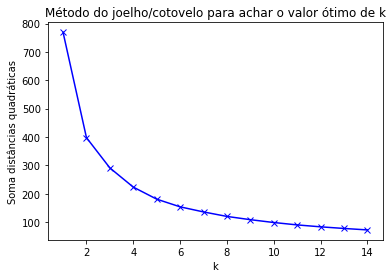

O método analítico informa que o joelho/cotovelo está em k = 4


In [30]:
data_numpy = data.to_numpy()

mms = MinMaxScaler()
mms.fit(data_numpy)
dados_transformados = mms.transform(data)

soma_distancias_quadraticas = []
K = range(1, 15)
print('\nK\tSoma das distâncias quadráticas')
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(dados_transformados)
  soma_distancias_quadraticas.append(km.inertia_)
  print(k, '\t', soma_distancias_quadraticas[k-1])

plt.plot(K, soma_distancias_quadraticas, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma distâncias quadráticas')
plt.title('Método do joelho/cotovelo para achar o valor ótimo de k')
plt.show()
kl = KneeLocator(K, soma_distancias_quadraticas, curve="convex", direction="decreasing")
print('O método analítico informa que o joelho/cotovelo está em k =', kl.elbow)

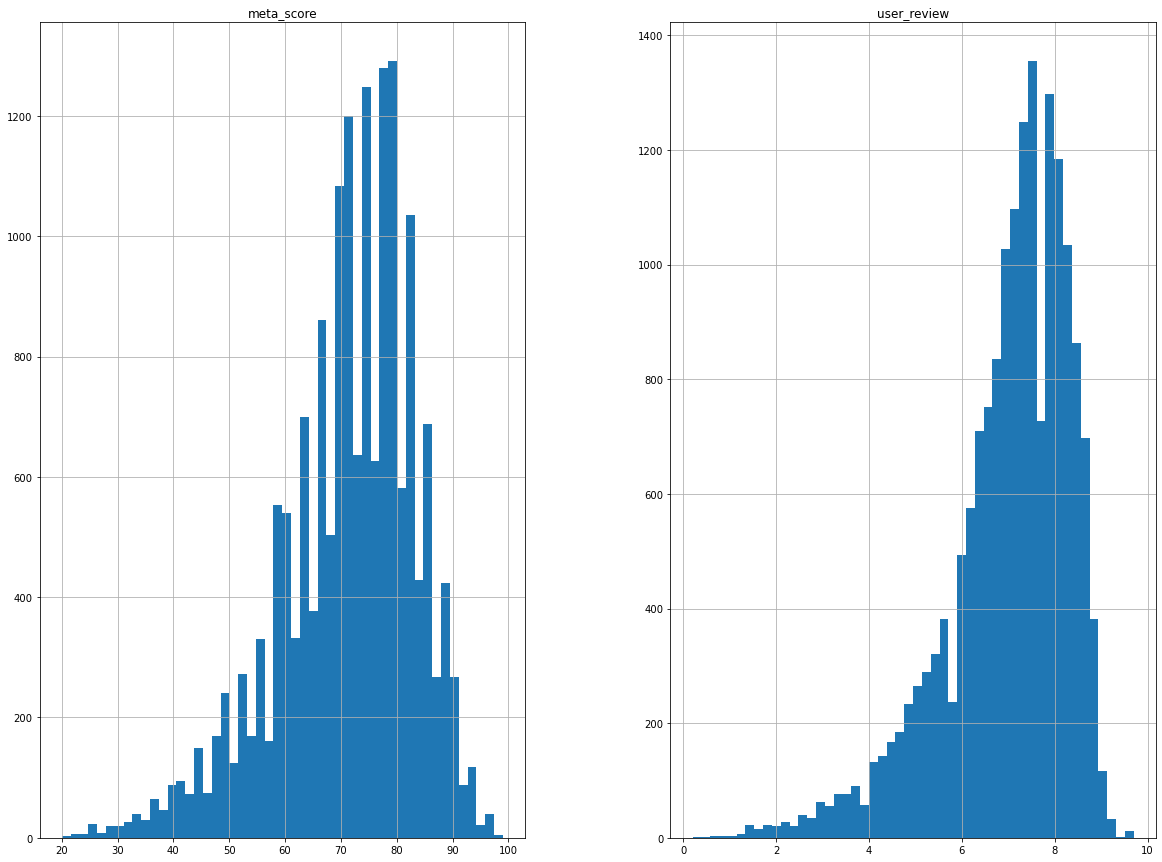

In [31]:
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Get Dummies


In [32]:
data = pd.read_csv('all_games.csv', encoding='utf-8')
data.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [33]:
listPlatform = list()
listPlatform = data['platform']
listPlatform

s = pd.Series(listPlatform)
dataDummies = pd.get_dummies(s)
dataDummies

,3DS,DS,Dreamcast,Game Boy Advance,GameCube,Nintendo 64,PC,PSP,PlayStation,PlayStation 2,...,PlayStation 5,PlayStation Vita,Stadia,Switch,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18798,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
dataDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0    3DS               18800 non-null  uint8
 1    DS                18800 non-null  uint8
 2    Dreamcast         18800 non-null  uint8
 3    Game Boy Advance  18800 non-null  uint8
 4    GameCube          18800 non-null  uint8
 5    Nintendo 64       18800 non-null  uint8
 6    PC                18800 non-null  uint8
 7    PSP               18800 non-null  uint8
 8    PlayStation       18800 non-null  uint8
 9    PlayStation 2     18800 non-null  uint8
 10   PlayStation 3     18800 non-null  uint8
 11   PlayStation 4     18800 non-null  uint8
 12   PlayStation 5     18800 non-null  uint8
 13   PlayStation Vita  18800 non-null  uint8
 14   Stadia            18800 non-null  uint8
 15   Switch            18800 non-null  uint8
 16   Wii               18800 non-null  uint8
 17   Wii U      

In [35]:
dataDummies.dtypes

 3DS                 uint8
 DS                  uint8
 Dreamcast           uint8
 Game Boy Advance    uint8
 GameCube            uint8
 Nintendo 64         uint8
 PC                  uint8
 PSP                 uint8
 PlayStation         uint8
 PlayStation 2       uint8
 PlayStation 3       uint8
 PlayStation 4       uint8
 PlayStation 5       uint8
 PlayStation Vita    uint8
 Stadia              uint8
 Switch              uint8
 Wii                 uint8
 Wii U               uint8
 Xbox                uint8
 Xbox 360            uint8
 Xbox One            uint8
 Xbox Series X       uint8
dtype: object

In [36]:
dataDummies.columns

Index([' 3DS', ' DS', ' Dreamcast', ' Game Boy Advance', ' GameCube',
       ' Nintendo 64', ' PC', ' PSP', ' PlayStation', ' PlayStation 2',
       ' PlayStation 3', ' PlayStation 4', ' PlayStation 5',
       ' PlayStation Vita', ' Stadia', ' Switch', ' Wii', ' Wii U', ' Xbox',
       ' Xbox 360', ' Xbox One', ' Xbox Series X'],
      dtype='object')

In [37]:
dataDummies[' 3DS']

0        0
1        0
2        0
3        0
4        0
        ..
18795    0
18796    0
18797    0
18798    0
18799    0
Name:  3DS, Length: 18800, dtype: uint8

In [38]:
# Separando em Treino e Teste
# Separando dataframe em dois conjuntos: teste e treino
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataDummies.drop(' PC', 
        axis=1), dataDummies[' PC'], test_size=0.40, random_state=101)
x_train
y_test

6476     0
18091    0
7641     0
1815     0
9238     1
        ..
5392     1
10636    1
6053     0
15148    0
3155     1
Name:  PC, Length: 7520, dtype: uint8

In [39]:
# Treinando 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
# Fazendo predições
predictions = logmodel.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [41]:
# precision
# recall
# f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5556
           1       1.00      1.00      1.00      1964

    accuracy                           1.00      7520
   macro avg       1.00      1.00      1.00      7520
weighted avg       1.00      1.00      1.00      7520



In [42]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

[[5554    2]
 [   0 1964]]


# KMEANS

# Histograma

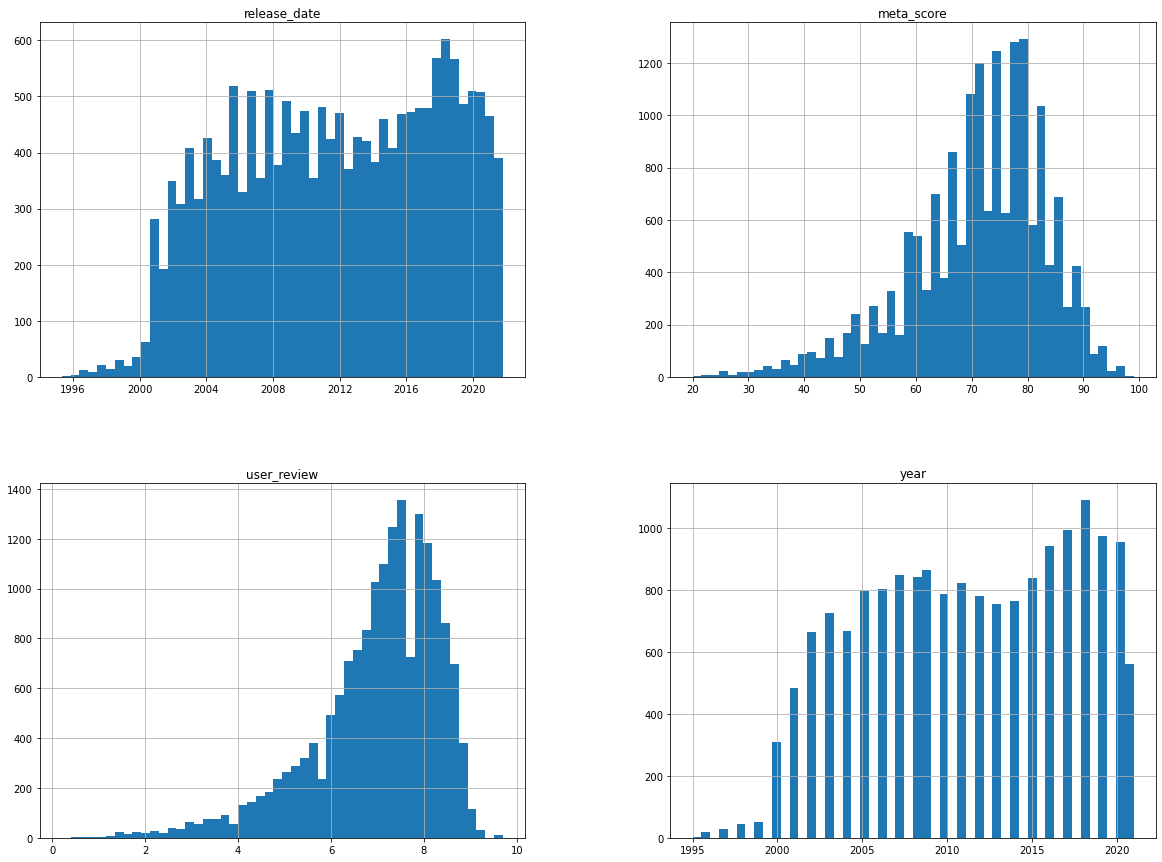

In [46]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()